<a href="https://colab.research.google.com/github/ssilvacris/Finance_exercises/blob/master/Time_Series_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series - Exercises

### Is the temperature a random walk (with drift)?

An ARMA model is a simplistic approach to predicting climate change, but it illustrates many of the topics covered in this class.

The temp_NY DataFrame contains the average annual temperature in Central Park, NY from 1870 to 2016 (data was downloaded from NOAA [here] (https://www.ncdc.noaa.gov/cdo-web/search)). Plot the data and test whether a random walk follows (with deviation)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

temp_NY = pd.read_csv('NOAA_TAVG.csv', index_col='DATE')
temp_NY.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


In [ ]:
#Verify the type of column
temp_NY.dtypes

TAVG    float64
dtype: object

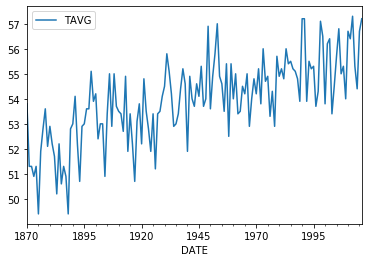

The p-value for the ADF test is  0.5832938987871152


In [ ]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value obtained was greater than 0.5, which means that we do not reject the null hypothesis where the series is a random walk.


## How to warm up: see autocorrelations

As the temperature series, temp_NY, is a random walk with deviation, make the first differences to make it stationary. Then, calculate the ACF and PACF sample. This will provide some guidance on the order of the model.

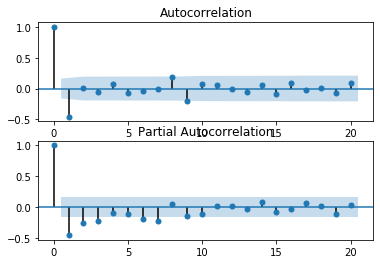

In [ ]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

## Which ARMA model is the best?

The Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures the quality of the fit, but applies a penalty on models with more parameters to discourage over-fit. Lower scores in AIC are better.

Adjust the temperature data to an AR (1), AR (2) and ARMA (1,1) and see which model is the best fit, using the AIC criterion. The AR (2) and ARMA (1,1) models have one more parameter than AR (1).

The annual temperature change is in a DataFrame chg_temp.

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

/Users/cristianedesouzadasilva/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/cristianedesouzadasilva/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/cristianedesouzadasilva/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.534689831391
The AIC for an AR(2) is:  501.92741231602264
The AIC for an ARMA(1,1) is:  469.0729106099135


## Don't throw that winter coat away yet

Finally, you will predict the temperature over the next 30 years using an ARMA model (1.1), including confidence bands around that estimate. Remember that drift estimation will have a much greater impact on long-range predictions than on ARMA parameters.

Previously, you determined that the temperature data follows a random walk and analyzed the data first. In this exercise, you will use the ARIMA module in the temperature data (before differentiation), which is identical to the use of the ARMA module in temperature changes, followed by accumulated sums of those changes to obtain the temperature forecast.


/Users/cristianedesouzadasilva/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/cristianedesouzadasilva/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


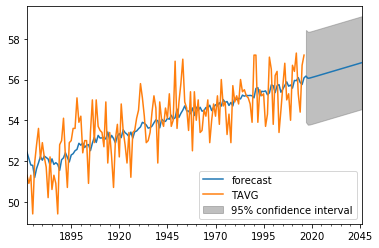

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Crie uma instância da classe ARIMA chamada mod para um modelo ARMA (1,1) integrado
#O d na ordem (p, d, q) é um, já que diferimos pela primeira vez uma vez
#Ajuste o mod usando o método .fit () e chame os resultados de res

mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

#Preveja a série usando o método plot_predict () em res
#Escolha a data de início como 1872-01-01 e a data de término como 2046-01-01

res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()